In [1]:
# Import required packages
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Load dataset
weather = pd.read_csv('weather-reports.csv')

In [3]:
# Show the first 5 entries in the dataset
weather.head()

,location,date,precipitation,temp_max,temp_min,wind,weather
0,Seattle,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,Seattle,2012-01-02,10.9,10.6,2.8,4.5,rain
2,Seattle,2012-01-03,0.8,11.7,7.2,2.3,rain
3,Seattle,2012-01-04,20.3,12.2,5.6,4.7,rain
4,Seattle,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
# Show general information of the values in each column
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
location         2922 non-null object
date             2922 non-null object
precipitation    2922 non-null float64
temp_max         2922 non-null float64
temp_min         2922 non-null float64
wind             2922 non-null float64
weather          2922 non-null object
dtypes: float64(4), object(3)
memory usage: 159.9+ KB


In [5]:
# Show the number of days for each weather
weather['weather'].value_counts()

sun        1674
fog         582
rain        459
drizzle     129
snow         78
Name: weather, dtype: int64

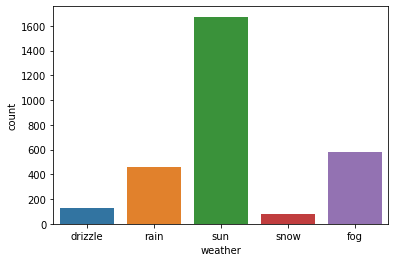

In [6]:
# Show a graph of count against weather
sns.countplot(weather['weather'])

# Response variable and Feature variable

In [7]:
# Separate the dataset into response variable(y) and feature variable(X) to be used in the model
# X is the entry with all the columns except the weather
# y is the weather of the entry
# We are trying to predict the response(the weather) from the other features
# Drop location and date as well because those will not help in predicting the weather
X = weather.drop(['weather', 'location', 'date'], axis = 1)
y = weather['weather'].str.contains('rain')
# We are only concerned about predicting if there is rain or not

# Train/Test split

In [8]:
# The dataset is split into a training set and a testing set
# The training set creates the model
# The testing set measures the accuracy of the model
# Typically 80% for training, and 20% for testing

# train_test_split splits dataset into random train and test subsets
# Each time you run it without specifying random_state, you will get a different result because the split is different
# By specifying the same random_state for every run, the outputs for every run will be always the same.
# It doesn't matter what the actual random_state number is as long as it is consistent.
# This is important for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standard scaling

In [9]:
# Applying standard scaling to get optimized result
# Standard scaling normalizes(mean = 0 and standard deviation = 1) the features/variables/columns of X individually
# before applying machine learning techniques
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [10]:
# Create the model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [11]:
# Look at the first 20 entries predicted, 19 days will not have rain and only 1 day will have rain
pred_rfc[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [12]:
# See how well the model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
# For the confusion matrix, [[a  b]
#                            [c  d]]
# y-axis is the actual values and x-axis is the predicted values
# a is the number of days there isn't rain which the model predicted correct
# b is the number of days there isn't rain which the model predicted wrong
# c is the number of days there is rain which the model predicted wrong
# d is the number of days there is rain which the model predicted correct
# So this model is accurate in predicting days where there isn't rain 
# but not so accurate in predicting days where there is rain

              precision    recall  f1-score   support

       False       0.85      0.95      0.90       485
        True       0.46      0.22      0.30       100

    accuracy                           0.82       585
   macro avg       0.66      0.58      0.60       585
weighted avg       0.79      0.82      0.80       585

[[459  26]
 [ 78  22]]


In [13]:
# Get the accuracy of the model as a final percentage
cm = accuracy_score(y_test, pred_rfc)
cm

0.8222222222222222